In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/py

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

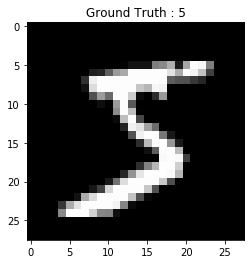

In [3]:
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [7]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [8]:
#scale data
train_data /=255.0
test_data /=255.0

In [9]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [10]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.2747 - accuracy: 0.9145 - val_loss: 0.1533 - val_accuracy: 0.9509
Epoch 2/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0922 - accuracy: 0.9715 - val_loss: 0.0900 - val_accuracy: 0.9729
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0697 - val_accuracy: 0.9791
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0701 - val_accuracy: 0.9794
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0877 - val_accuracy: 0.9762
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0659 - val_accuracy: 0.9802
Epoch 7/20
60000/60000 [==============================] - 6s 1

In [11]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 81us/step
Evaluation result on Test Data : Loss = 0.14171044317796228, accuracy = 0.982200026512146


In [23]:
print(history.history)

{'val_loss': [0.15328406630158425, 0.089963105120603, 0.06972652938701213, 0.07006780037626159, 0.08766857575625181, 0.06590939724801574, 0.07600331909190863, 0.07787934005740463, 0.09999905456564284, 0.09923041043053381, 0.09609522164959633, 0.11597900902369293, 0.09918679569619271, 0.12127691689133638, 0.11550874353420222, 0.14035681219174467, 0.1150015718351584, 0.1564666978346184, 0.12773224152382462, 0.14171044225213336], 'val_accuracy': [0.9509000182151794, 0.9728999733924866, 0.9790999889373779, 0.9793999791145325, 0.9761999845504761, 0.9801999926567078, 0.980400025844574, 0.9814000129699707, 0.9801999926567078, 0.979200005531311, 0.9824000000953674, 0.9793999791145325, 0.982699990272522, 0.9807999730110168, 0.9818999767303467, 0.9805999994277954, 0.9836000204086304, 0.9801999926567078, 0.9817000031471252, 0.982200026512146], 'loss': [0.2746646710117658, 0.09223209805488586, 0.058609863001604874, 0.03961990443468094, 0.028762753763794897, 0.021600353087484838, 0.0171538366933663

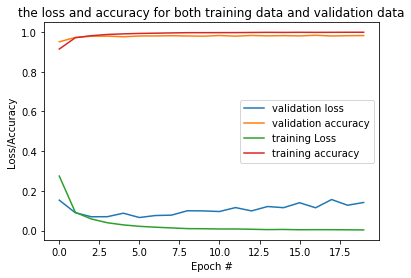

In [26]:
#plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 20), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 20), history.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 20), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 20), history.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

[6]


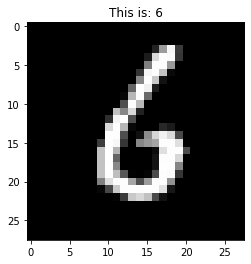

In [34]:
# To plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data


predict_classe = model.predict_classes(test_data[[50],:])
print(predict_classe)
plt.imshow(test_images[50].reshape((28, 28)), cmap = 'gray')
plt.title("This is: " + str(predict_classe[0]))
plt.show()
